In [2]:
import requests
import json
import pandas as pd
from   sklearn.feature_extraction.text import TfidfVectorizer

# Get YouTube Comments(YouTubeのコメントを取得します。)
https://qiita.com/chieeeeno/items/ba0d2fb0a45db786746f

In [6]:
URL = 'https://www.googleapis.com/youtube/v3/'
API_KEY = 'get the API'########!"!!!!!!!!!!!!!!!!!!!!!!!!!!!!"

In [7]:
def print_video_comment(video_id, n=10):
    comment = pd.DataFrame()
    params = {
        'key': API_KEY,
        'part': 'snippet',
        'videoId': video_id,
        'order': 'relevance',
        'textFormat': 'plaintext',
        'maxResults': n,
    }
    response = requests.get(URL + 'commentThreads', params=params)
    resource = response.json()
    for comment_info in resource['items']:
        # コメント
        text = comment_info['snippet']['topLevelComment']['snippet']['textDisplay']
        # グッド数
        like_cnt = comment_info['snippet']['topLevelComment']['snippet']['likeCount']
        # 返信数
        reply_cnt = comment_info['snippet']['totalReplyCount']
        temp = pd.DataFrame([[text,like_cnt,reply_cnt]])
        comment = comment.append(temp) 
    return comment

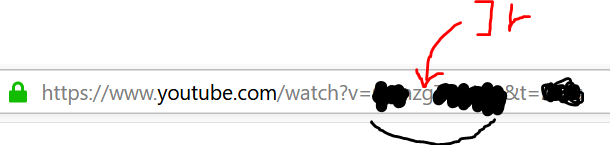

In [9]:
video_id = 'chose URL' #動画ＵＲＬのｖ＝以下。
#                                       ↓実験の結果、マックスが１００でした。１０１不可。
komento = print_video_comment(video_id, n=100) 

# 取得したデータを保存⇒読み込みする

In [10]:
import openpyxl

In [11]:
##                  ↓直下に作成。
komento.to_excel('komento.xlsx', index=False)

# テキストマイニング用データ作成

In [21]:
#データの読み込み＆データセットの作成。
##上で作ったエクセルを愚直に並べるだけ。
komento = pd.read_excel('komento.xlsx')

In [75]:
komento[0][50:]

50        積立保険が必要もない事はわかったけど他のどんなものに投資したらいいのかわからないんだよなあ
51    初めまして。わかりすい解説に驚きと感謝です。この手の動画、そもそものつかわれる言葉が難しくて...
52    利率7%で運用できるってあるんですか？\nでもハイリスクハイリターンなので、そんな利率で損な...
53    「不幸の宝くじ」という言い回しに感銘を受けました。\n具体的な根拠なく自らが不幸になると予想...
54                                         これ聞いて保険解約した。
55    大変勉強になりました。ありがとうございます。\nお考えを伺いたいのですが、医療保障などの特約...
56    生命保険やがん保険、学資保険に合計年額45万円も入っていました・・・\n中にはiDeCoの下...
57                                            えー！(心の声)w
58                  プルデンシャルの生命保険について聞きたいです。手数料とか全くないです。
59                                                 税金対策
60                                           まじで有益すぎる動画
61    保険売ってる人たちもほとんど投資の勉強をしていないから、「保険が全て！」みたいな発想になるん...
Name: 0, dtype: object

# テキストマイニング開始。

In [12]:
#★★ Janome 'Hello 蛇の目'★★
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import *

In [13]:
from pathlib import Path
import itertools
import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# コメントに登場した”単語”の数を数えてみる。

In [105]:
#ジャンル（文章）ごとの形態素解析を定義
tan_list_bunS = [] #ジャンル（文章）ごとの出現単語を登場させる。
t = Tokenizer()
for what in komento[0]:
    temp_tan_list_bun = []
    all_kome      = what
    temp_tan_list_bun = [token.base_form for token in t.tokenize(all_kome)
             if token.part_of_speech.startswith('動詞')
             or token.part_of_speech.startswith('名詞,一般')
             or token.part_of_speech.startswith('形容詞')
                    ]
    tan_list_bunS.append(temp_tan_list_bun)    

In [ ]:
tan_list_bunS

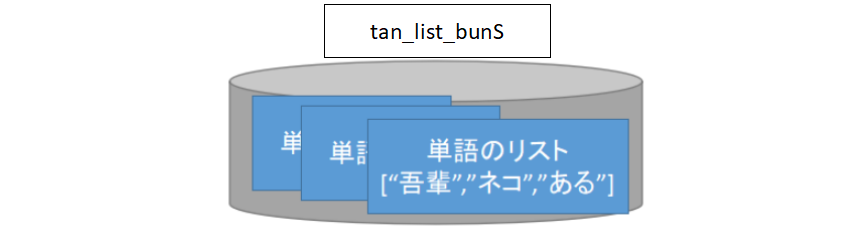

# doc2vec（ジャンル（文章）ごとに文章をベクトル化する。）
# word2vecにも対応！
https://qiita.com/naotaka1128/items/2c4551abfd40e43b0146#2-gensim-%E3%81%A7-doc2vec-%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E6%A7%8B%E7%AF%89

In [107]:
#解析用データ作成ツール。
# 参考記事： http://qiita.com/okappy/items/32a7ba7eddf8203c9fa1
class LabeledListSentence(object):
    def __init__(self, words_list, labels):
        self.words_list = words_list
        self.labels = labels

    def __iter__(self):
        for i, words in enumerate(self.words_list):
            yield models.doc2vec.LabeledSentence(words, ['%s' % self.labels[i]])

In [108]:
#クラスごとにラベルを構築
cls_list_bunS = []
for what in range(1,97):
    cls_list_bunS.append(what)

In [119]:
# ライブラリ読み込み
from gensim import models

sentences = LabeledListSentence(tan_list_bunS, cls_list_bunS)
model = models.Doc2Vec(alpha=0.25, min_count=1,
                       size=2, iter=10,works=13)
model.build_vocab(sentences)
model.train(sentences, total_examples = model.corpus_count, epochs = model.epochs)

companies = model.docvecs.offset2doctag

C:\Users\araik\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:570: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
C:\Users\araik\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\araik\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  # Remove the CWD from sys.path while we load stuff.


In [120]:
model.docvecs.vectors_docs[:3]

array([[0.25087833, 0.2581213 ],
       [1.7307739 , 1.2147293 ],
       [1.1227889 , 0.946293  ]], dtype=float32)

In [121]:
df_vec = pd.DataFrame(model.docvecs.vectors_docs)

In [122]:
df_vec[:3]

,0,1
0,0.250878,0.258121
1,1.730774,1.214729
2,1.122789,0.946293


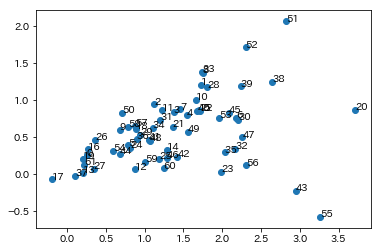

In [123]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(df_vec[:][0], df_vec[:][1])
# 下の二行で各点に番号をつける
for i,(x,y) in enumerate(zip( df_vec[:][0], df_vec[:][1])):
    ax.annotate(str(i),(x,y))